In [1]:
import os
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

import pandas as pd
from pytrends.request import TrendReq

from fbprophet import Prophet

In [2]:
def searchTrends(words):
    print("Starting API...")
    pt = TrendReq(hl='en-US', tz = 360)
    print("Loading key words...")
    pt.build_payload(words, cat=0, timeframe='today 3-m', geo='MX', gprop='')
    print("Getting data...")
    data = pt.interest_over_time()
    print(data)
    return data

In [3]:
data = searchTrends(["bob esponja meme"])
data.drop(columns=['isPartial'], inplace=True)
data.reset_index(inplace = True)
data.columns = ["ds","y"]

Starting API...
Loading key words...
Getting data...
            bob esponja meme  isPartial
date                                   
2019-02-08                44      False
2019-02-09                38      False
2019-02-10                16      False
2019-02-11                18      False
2019-02-12                24      False
2019-02-13                18      False
2019-02-14                25      False
2019-02-15                27      False
2019-02-16                31      False
2019-02-17                 8      False
2019-02-18                32      False
2019-02-19                12      False
2019-02-20                53      False
2019-02-21                24      False
2019-02-22                38      False
2019-02-23                31      False
2019-02-24                24      False
2019-02-25                36      False
2019-02-26                 6      False
2019-02-27                76      False
2019-02-28                63      False
2019-03-01               10

In [4]:
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
future = model.make_future_dataframe(periods=30)
future.tail()

,ds
112,2019-05-31
113,2019-06-01
114,2019-06-02
115,2019-06-03
116,2019-06-04


In [6]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
112,2019-05-31,42.041572,26.931812,74.152066,42.041566,42.041576,9.386090,9.386090,9.386090,9.386090,9.386090,9.386090,0.0,0.0,0.0,51.427662
113,2019-06-01,42.107176,25.098047,70.202099,42.107171,42.107181,5.813965,5.813965,5.813965,5.813965,5.813965,5.813965,0.0,0.0,0.0,47.921141
114,2019-06-02,42.172780,15.434368,62.272198,42.172775,42.172786,-2.700795,-2.700795,-2.700795,-2.700795,-2.700795,-2.700795,0.0,0.0,0.0,39.471985
115,2019-06-03,42.238385,14.888350,64.893137,42.238379,42.238391,-3.409319,-3.409319,-3.409319,-3.409319,-3.409319,-3.409319,0.0,0.0,0.0,38.829066
116,2019-06-04,42.303989,9.841871,56.917558,42.303983,42.303996,-8.617440,-8.617440,-8.617440,-8.617440,-8.617440,-8.617440,0.0,0.0,0.0,33.686550


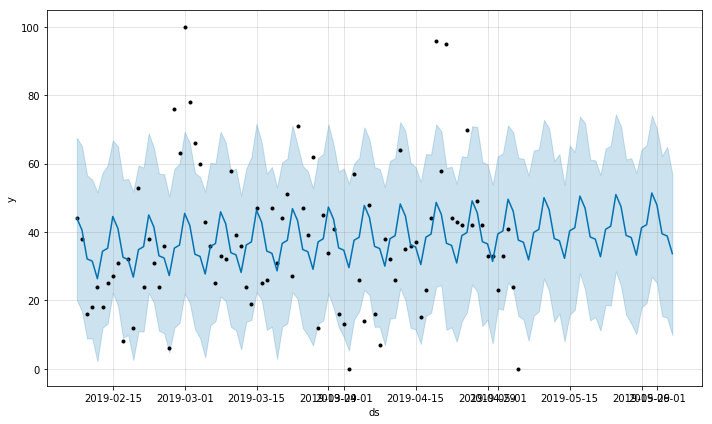

In [7]:
fig1 = model.plot(forecast)

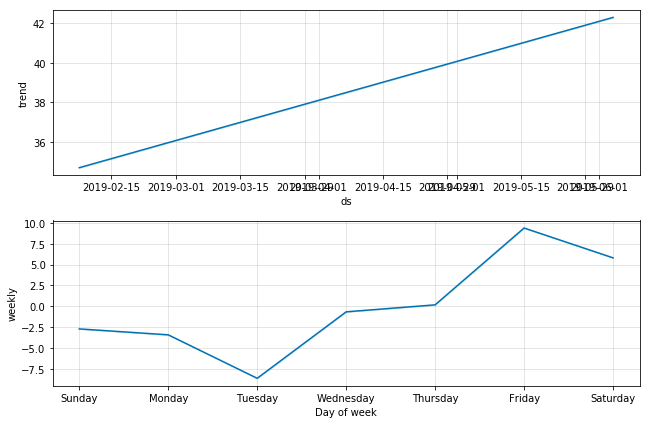

In [8]:
fig2 = model.plot_components(forecast)

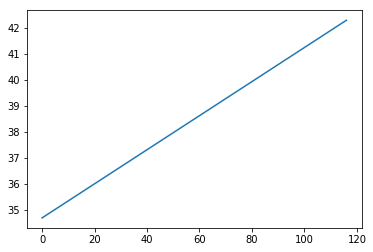

In [9]:
plt.plot(forecast["trend"])

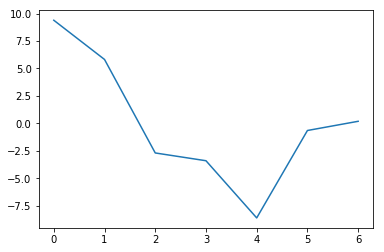

In [10]:
plt.plot(forecast["weekly"][:7])